____future____

make the target the next day close 
the things we use to predict that close as the previous day close and open

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.model_selection import train_test_split
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes

In [12]:
df = pd.read_csv("/Users/zachadams/Stocks/stockCSV/LYFT.csv")
df

,date,1. open,2. high,3. low,4. close,5. volume
0,2020-03-13,25.50,25.5900,22.6356,24.17,12411797.0
1,2020-03-12,24.37,26.4000,23.8700,23.88,13630929.0
2,2020-03-11,31.49,31.8000,26.6829,29.01,19867098.0
3,2020-03-10,34.15,34.6422,30.6062,32.89,9774836.0
4,2020-03-09,32.49,34.6500,31.6400,32.81,8987182.0
...,...,...,...,...,...,...
237,2019-04-04,70.48,72.8900,70.2200,72.00,9233730.0
238,2019-04-03,70.06,72.0000,69.1200,70.00,15662287.0
239,2019-04-02,66.90,70.2000,66.1000,68.97,22483330.0
240,2019-04-01,74.90,75.0000,67.7800,69.01,41799258.0


In [13]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')

Text(0.5, 0, 'starting')

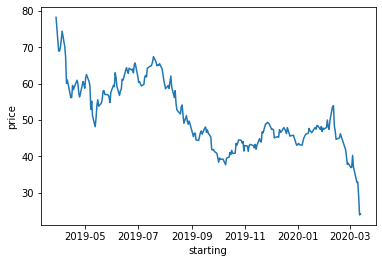

In [14]:
plt.plot(df['date'][:1000],df['4. close'][:1000])
plt.ylabel("price")
plt.xlabel("starting")

In [15]:
X = df.drop('4. close', axis = 1)
X = X.drop('date', axis = 1)
X = X.drop('5. volume', axis = 1)
X

,1. open,2. high,3. low
0,25.50,25.5900,22.6356
1,24.37,26.4000,23.8700
2,31.49,31.8000,26.6829
3,34.15,34.6422,30.6062
4,32.49,34.6500,31.6400
...,...,...,...
237,70.48,72.8900,70.2200
238,70.06,72.0000,69.1200
239,66.90,70.2000,66.1000
240,74.90,75.0000,67.7800


In [16]:
y = df['4. close']
y

0      24.17
1      23.88
2      29.01
3      32.89
4      32.81
       ...  
237    72.00
238    70.00
239    68.97
240    69.01
241    78.29
Name: 4. close, Length: 242, dtype: float64

In [58]:
size = 100
X_train = X[size:]
X_test = X[:size]
y_train = y[size:]
y_test = y[:size]
X_train

,1. open,2. high,3. low
100,41.61,41.66,40.35
101,40.53,42.07,40.21
102,40.90,41.02,39.85
103,39.80,41.18,39.65
104,39.93,40.31,39.25
...,...,...,...
237,70.48,72.89,70.22
238,70.06,72.00,69.12
239,66.90,70.20,66.10
240,74.90,75.00,67.78


In [59]:
mdl = neighbors.KNeighborsRegressor(n_neighbors = 5, weights = "distance", algorithm = "auto")
mdl.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance')

In [60]:
y_pred = mdl.predict(X_test)

In [61]:
from sklearn.metrics import mean_squared_error as mse

In [62]:
mse(y_pred,y_test)

6.571006901988795

In [41]:
pred_df = df.copy(deep = True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 0, 'date')

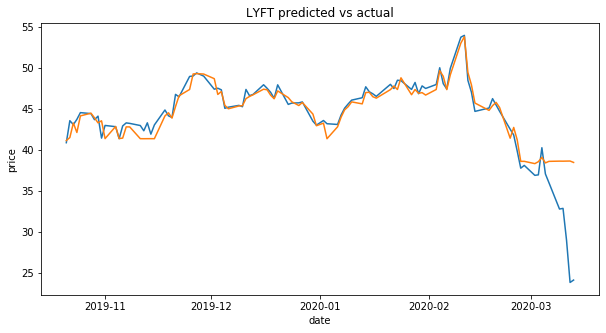

In [42]:
plt.figure(figsize = (10,5))
pred_df['4. close'][:size] = y_pred
plt.title(label = "LYFT predicted vs actual")
plt.plot(df['date'][:size], df['4. close'][:size])
plt.plot(pred_df['date'][:size], pred_df['4. close'][:size])
plt.ylabel("price")
plt.xlabel("date")

In [28]:
pred_df['4. close'][:500]

0      38.479946
1      38.649876
2      38.642854
3      38.632914
4      38.637951
         ...    
237    72.000000
238    70.000000
239    68.970000
240    69.010000
241    78.290000
Name: 4. close, Length: 242, dtype: float64

In [29]:
df['4. close'][:500]

0      24.17
1      23.88
2      29.01
3      32.89
4      32.81
       ...  
237    72.00
238    70.00
239    68.97
240    69.01
241    78.29
Name: 4. close, Length: 242, dtype: float64